# Reading Mixing Database Files w/ Python
## This notebook contains examples of reading and plottingnetcdf files in the mixing database w/ python. 
## Andy Pickering - OSU

In [23]:
# import libraries
import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
import pandas as pd
# show plots in the notebook
%matplotlib inline              

In [2]:
# ! lets you run terminal/bash commands from notebook
# get list of data files
!ls data/

natre_10.nc  natre_122.nc natre_147.nc natre_31.nc  natre_54.nc  natre_77.nc
natre_100.nc natre_123.nc natre_148.nc natre_32.nc  natre_55.nc  natre_78.nc
natre_101.nc natre_126.nc natre_149.nc natre_33.nc  natre_56.nc  natre_79.nc
natre_102.nc natre_127.nc natre_15.nc  natre_34.nc  natre_57.nc  natre_8.nc
natre_103.nc natre_128.nc natre_151.nc natre_35.nc  natre_58.nc  natre_80.nc
natre_104.nc natre_129.nc natre_152.nc natre_36.nc  natre_59.nc  natre_81.nc
natre_105.nc natre_13.nc  natre_153.nc natre_37.nc  natre_6.nc   natre_82.nc
natre_106.nc natre_130.nc natre_154.nc natre_38.nc  natre_60.nc  natre_83.nc
natre_107.nc natre_131.nc natre_155.nc natre_39.nc  natre_61.nc  natre_84.nc
natre_108.nc natre_132.nc natre_16.nc  natre_4.nc   natre_62.nc  natre_85.nc
natre_109.nc natre_133.nc natre_17.nc  natre_40.nc  natre_63.nc  natre_86.nc
natre_11.nc  natre_134.nc natre_18.nc  natre_41.nc  natre_64.nc  natre_87.nc
natre_110.nc natre_135.nc natre_19.nc  natre_42.nc  natre_65.nc  natre_88.nc


In [3]:
# read a netcdf file
myfile = 'data/natre_10.nc'
fh = Dataset(myfile, mode='r')

In [4]:
# look at the structure of the file we read in
fh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    netcdf_version: 4
    project: North Atlantic Tracer Release Experiment (NATRE)
    expocode: 32OC250_4
    cast_number: 10.0
    title: Microstructure profiler data from the ship Oceanus with cruise dates 1992-03-25 to 1992-04-22.
    time: Mar-29-1992
    latitude: 24.7345
    longitude: -30.7293333333
    chief_scientist: Raymond W. Schmitt
    data_originator: Polzin
    institution: WHOI
    data_assembly_center: CCHDO
    dimensions(sizes): LATITUDE(1), LONGITUDE(1), TIME(1), DEPTH(7962)
    variables(dimensions): float64 LATITUDE(LATITUDE), float64 LONGITUDE(LONGITUDE), float64 TIME(TIME), float64 DEPTH(DEPTH), float64 CHI-T(DEPTH), float64 EPSILON(DEPTH), float64 PRESSURE(DEPTH), float64 PSAL(DEPTH), float64 TEMPERATURE(DEPTH)
    groups: 

In [5]:
# list the variables (variables is a dictionary?)
fh.variables.keys()

odict_keys(['LATITUDE', 'LONGITUDE', 'TIME', 'DEPTH', 'CHI-T', 'EPSILON', 'PRESSURE', 'PSAL', 'TEMPERATURE'])

In [14]:
# you can get variables as class netCDF4.Variable:
P_netcdf = fh.variables['PRESSURE']
temp_netcdf = fh.variables['TEMPERATURE']
type(P_netcdf)

netCDF4._netCDF4.Variable

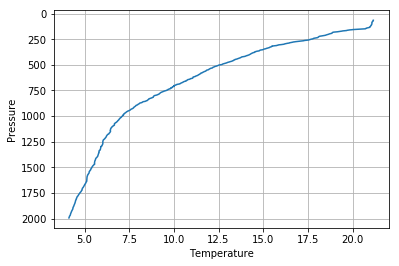

In [17]:
# and plot them
plt.plot(temp_netcdf,P_netcdf)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Pressure')

In [15]:
# or you can also extract variables as numpy arrays:
P_np = fh.variables['PRESSURE'][:]
temp_np = fh.variables['TEMPERATURE'][:]
type(P_np)

numpy.ndarray

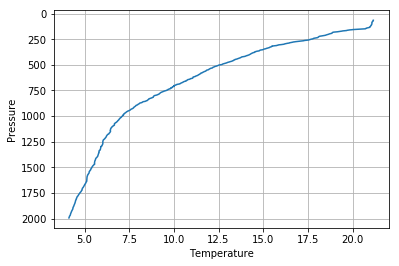

In [16]:
# and plot them...
plt.plot(temp_np,P_np)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Pressure')

In [58]:
# and we can make a Dataframe with the extracted variables
chiT = fh.variables['CHI-T'][:]
eps  = fh.variables['EPSILON'][:]
temp = fh.variables['TEMPERATURE'][:]
sal  = fh.variables['PSAL'][:]
P    = fh.variables['PRESSURE'][:]
mydict = {'chi':chiT , 'eps':eps , 'P':P, 'temp':temp, 'sal':sal}
df = pd.DataFrame(mydict,index=P)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7962 entries, nan to nan
Data columns (total 5 columns):
P       3858 non-null float64
chi     3858 non-null float64
eps     3793 non-null float64
sal     3858 non-null float64
temp    3858 non-null float64
dtypes: float64(5)
memory usage: 373.2 KB


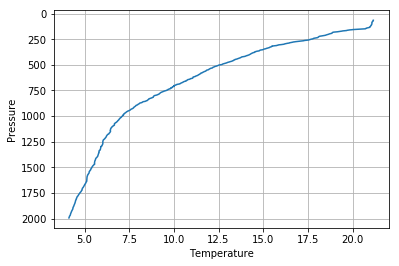

In [28]:
plt.plot(df.temp,df.P)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Pressure')

In [20]:
# make a function to load in 1 profile 
def read_mix_nc(profile_num):
    myfile = 'data/natre_' + str(profile_num) + '.nc'
    print(myfile)
    fh = Dataset(myfile, mode='r')
    return fh

In [69]:
# make a function to plot one profile

def plot_mix_profile(fh):

    fig,axes = plt.subplots(2,2,figsize=(10,10))

    axes[0,0].plot(df.temp,df.P)
    axes[0,0].invert_yaxis()
    axes[0,0].grid()
    axes[0,0].set_xlabel('temp.')
    axes[0,0].set_ylabel('P')
    
    axes[0,1].plot(df.sal,df.P)
    axes[0,1].invert_yaxis()
    axes[0,1].grid()
    axes[0,1].set_xlabel('sal')
    axes[0,1].set_ylabel('P')
    
    axes[1,0].scatter(np.log10(df.chi),df.P,alpha=0.2)
    axes[1,0].invert_yaxis()
    axes[1,0].grid()
    axes[1,0].set_xlabel('log10[chi]')
    axes[1,0].set_ylabel('P')

    axes[1,1].scatter(np.log10(df.eps),df.P,alpha=0.2)
    axes[1,1].invert_yaxis()
    axes[1,1].grid()
    axes[1,1].set_xlabel('log10[eps]')
    axes[1,1].set_ylabel('P')
    
    return fig,axes

#plt.subplots

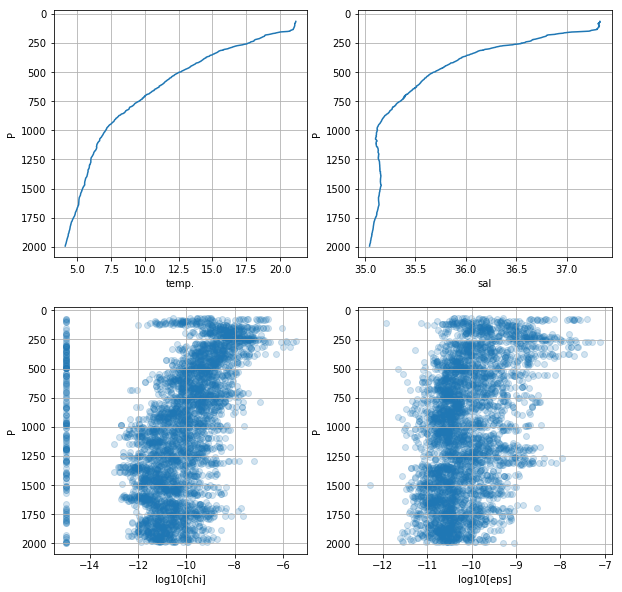

In [70]:
fig,axes = plot_mix_profile(fh)